# EDA ITC Final Project

## RANZCR CLiP - Catheter and Line Position Challenge

The **Royal Australian and New Zealand College of Radiologists (RANZCR)** is a not-for-profit professional organisation for clinical radiologists and radiation oncologists in Australia, New Zealand, and Singapore. 

### Motivation

Serious complications can occur as a result of malpositioned lines and tubes in patients. **Doctors and nurses frequently use checklists for placement of lifesaving equipment to ensure they follow protocol in managing patients**. Yet, these steps can be time consuming and are still prone to human error, especially in stressful situations when hospitals are at capacity. 

The gold standard for the confirmation of line and tube positions are chest radiographs. However, a physician or radiologist must manually check these chest x-rays to verify that the lines and tubes are in the optimal position.

### Goal

In this competition, **you’ll detect the presence and position of catheters and lines** on chest x-rays. Use machine learning to train and test your model on 40,000 images to categorize a tube that is poorly placed.

### Dataset

The dataset has been labelled with a set of definitions to ensure consistency with labelling. **The normal category** includes lines that were appropriately positioned and did not require repositioning. **The borderline category** includes lines that would ideally require some repositioning but would in most cases still function adequately in their current position. **The abnormal category** included lines that required immediate repositioning.

You will need the ``train``and ``test`` images. ``train.csv`` contains **image IDs**, **binary labels**, and **patient IDs**

**TFRecords are available for both train and test.**

We've also included ``train_annotations.csv``. These are segmentation annotations for training samples that have them. They are included solely as additional information for competitors.

#### Files

- ``train.csv`` - contains image IDs, binary labels, and patient IDs.

- ``sample_submission.csv`` - a sample submission file in the correct format

- ``test`` - test images
- ``train`` - training images

#### Columns

- ``StudyInstanceUID`` - unique ID for each image
- ``ETT - Abnormal`` - endotracheal tube placement abnormal
- ``ETT - Borderline`` - endotracheal tube placement borderline abnormal
- ``ETT - Normal`` - endotracheal tube placement normal
- ``NGT - Abnormal`` - nasogastric tube placement abnormal
- ``NGT - Borderline`` - nasogastric tube placement borderline abnormal
- ``NGT - Incompletely Imaged`` - nasogastric tube placement inconclusive due to imaging
- ``NGT - Normal`` - nasogastric tube placement borderline normal
- ``CVC - Abnormal`` - central venous catheter placement abnormal
- ``CVC - Borderline`` - central venous catheter placement borderline abnormal
- ``CVC - Normal`` - central venous catheter placement normal
- ``Swan Ganz Catheter Present`` - [Pulmonary artery catheter](https://en.wikipedia.org/wiki/Pulmonary_artery_catheter) 
- ``PatientID`` - unique ID for each patient in the dataset


#### train.csv

In [1]:
import pandas as pd
import zipfile

In [2]:
zf = zipfile.ZipFile('ranzcr-clip-catheter-line-classification.zip')
df = pd.read_csv(zf.open('train.csv'))

In [3]:
df.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1


We are going to check the data types. Every feature should be categorical nominal.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30083 entries, 0 to 30082
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StudyInstanceUID            30083 non-null  object
 1   ETT - Abnormal              30083 non-null  int64 
 2   ETT - Borderline            30083 non-null  int64 
 3   ETT - Normal                30083 non-null  int64 
 4   NGT - Abnormal              30083 non-null  int64 
 5   NGT - Borderline            30083 non-null  int64 
 6   NGT - Incompletely Imaged   30083 non-null  int64 
 7   NGT - Normal                30083 non-null  int64 
 8   CVC - Abnormal              30083 non-null  int64 
 9   CVC - Borderline            30083 non-null  int64 
 10  CVC - Normal                30083 non-null  int64 
 11  Swan Ganz Catheter Present  30083 non-null  int64 
 12  PatientID                   30083 non-null  object
dtypes: int64(11), object(2)
memory usage: 3.0+ MB


Now we are going to analyze the balance for every different type of catheter.

#### ETT (endotracheal tube)

In [5]:
ETT = df[['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal']].sum()

In [6]:
ETT

ETT - Abnormal        79
ETT - Borderline    1138
ETT - Normal        7240
dtype: int64

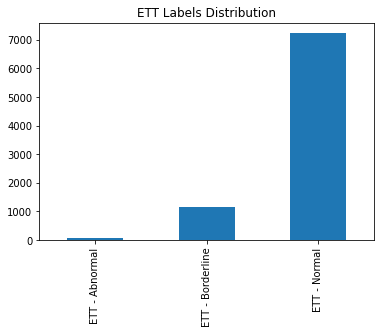

In [7]:
ETT.plot.bar(title='ETT Labels Distribution');

In [8]:
ETT/ETT.sum()*100

ETT - Abnormal       0.934137
ETT - Borderline    13.456308
ETT - Normal        85.609554
dtype: float64

In [9]:
ETT[['ETT - Abnormal', 'ETT - Borderline']].sum()/ETT['ETT - Normal']

0.1680939226519337

We can see that the dataset is imbalanced. If we sum the abnormal + borderline cases the ratio between this cases and the normal is $1/6$

So for this case we recommend to implement oversampling using data augmentation for the abnormal case.

As sanity check we also need to check if each label is unique for each example (at it should be)

In [10]:
df[df[['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal']].sum(axis=1) > 1]

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID


So there isn't any superposition between labels for this category.

#### NGT (nasogastric tube)

In [11]:
NGT = df[['NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal']].sum()

In [12]:
NGT

NGT - Abnormal                279
NGT - Borderline              529
NGT - Incompletely Imaged    2748
NGT - Normal                 4797
dtype: int64

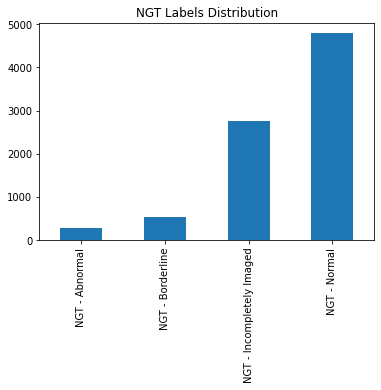

In [13]:
NGT.plot.bar(title='NGT Labels Distribution');

We can see that a **considerable amount of examples fall in the incomplete images category** what could be a problem

In [14]:
NGT/NGT.sum()*100

NGT - Abnormal                3.340117
NGT - Borderline              6.333054
NGT - Incompletely Imaged    32.898360
NGT - Normal                 57.428469
dtype: float64

We can see that this data is also imbalanced.

If we group again abnormal and borderline and we ignore the incompletely the ratio between the categories will be:

In [15]:
NGT[['NGT - Abnormal', 'NGT - Borderline']].sum()/NGT['NGT - Normal']

0.1684386074629977

aproximately $1/6$

Also we see that incompletely imaged represent almost 32% of the total data therefore is not despicable.

Also as sanity check we also need to check if each label is unique for each example (at it should be)

In [16]:
inconsistent = df[df[[
    'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',
    'NGT - Normal'
]].sum(axis=1) > 1][[
    'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',
    'NGT - Normal'
]]

inconsistent

,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal
10,1,0,0,1
191,1,1,0,0
354,0,1,1,0
1552,0,1,0,1
1884,0,1,0,1
1890,0,0,1,1
2083,1,0,1,0
3319,1,0,1,0
4368,0,1,0,1
5016,1,0,0,1


In [17]:
len(inconsistent)

45

We can see that there are $45$ inconsistent registers. Maybe the incompletely imaged can be repair but any other case should be remove from the dataset.

#### CVC (central venous catheter)

In [18]:
CVC = df[['CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal']].sum()

In [19]:
CVC

CVC - Abnormal       3195
CVC - Borderline     8460
CVC - Normal        21324
dtype: int64

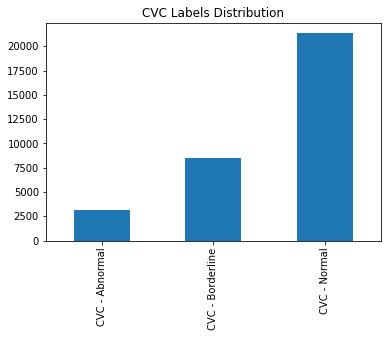

In [20]:
CVC.plot.bar(title='CVC Labels Distribution');

In [21]:
CVC/CVC.sum()*100

CVC - Abnormal       9.687983
CVC - Borderline    25.652688
CVC - Normal        64.659329
dtype: float64

In [22]:
CVC[['CVC - Abnormal', 'CVC - Borderline']].sum()/CVC['CVC - Normal']

0.5465672481710748

This is the type of catheter that is most balanced. If we sum the abnormal + borderline cases the ratio between this cases and the normal is $1/2$

As sanity check we also need to check if each label is unique for each example (at it should be)

In [23]:
inconsistent = df[df[['CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal']].sum(axis=1) > 2][['CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal']]
inconsistent

,CVC - Abnormal,CVC - Borderline,CVC - Normal
182,1,1,1
188,1,1,1
649,1,1,1
1307,1,1,1
1524,1,1,1
...,...,...,...
27504,1,1,1
28738,1,1,1
29332,1,1,1
29502,1,1,1


In [24]:
len(inconsistent)

71

There are 71 inconsistent registers. This time there's no way to solve this inconsistency to this registers should be removed from the dataset. 

**Observation:** Is possible that this refer to more than one catheter in the same picture. Unfortunately if this is the case we dont have the means to distinguish which catheter is wich.

### Catheter Overlap

In [25]:
catheters_types = [
    'ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal',
    'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal',
    'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal'
]

non_category = df[df[catheters_types].sum(axis=1) == 0][catheters_types]

In [26]:
non_category

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal
1768,0,0,0,0,0,0,0,0,0,0
3410,0,0,0,0,0,0,0,0,0,0
3792,0,0,0,0,0,0,0,0,0,0
4528,0,0,0,0,0,0,0,0,0,0
4706,0,0,0,0,0,0,0,0,0,0
5536,0,0,0,0,0,0,0,0,0,0
5819,0,0,0,0,0,0,0,0,0,0
5913,0,0,0,0,0,0,0,0,0,0
7039,0,0,0,0,0,0,0,0,0,0
8206,0,0,0,0,0,0,0,0,0,0


In [27]:
len(non_category)

24

There are $24$ without label. So this type of record will not be useful for the task and must be removed.

In [28]:
overlap = df[df[catheters_types].sum(axis=1) > 1][catheters_types]

In [29]:
overlap

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal
1,0,0,1,0,0,1,0,0,0,1
5,0,0,1,0,0,0,1,0,0,1
6,0,0,0,0,0,0,0,0,1,1
7,0,0,1,0,0,0,1,0,1,0
8,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
30068,0,0,1,0,0,1,0,1,0,1
30069,0,0,1,0,0,0,1,0,0,0
30078,0,0,1,0,0,0,0,0,1,1
30080,0,0,1,0,0,1,0,1,0,1


In [30]:
len(overlap)

11203

There are $11203$ registers with some kind of overlap between labels. Some of these issues are possible to solve but in general I would recommend to discard this registers at least for the development of the baseline model.

So in total we have:

In [31]:
len(overlap) + len(non_category)

11227

register with some kind of problem. This represent:

In [32]:
(len(overlap) + len(non_category))/len(df) * 100

37.32008110893196

a $37\%$ of the total, which is not negligible at all.

### Image Analysis

In [35]:
import tensorflow as tf

zf = zipfile.ZipFile('ranzcr-clip-catheter-line-classification.zip')

<zipfile.ZipExtFile name='train_tfrecords/00-1881.tfrec' mode='r' compress_type=deflate>

In [36]:
train = tf.data.TFRecordDataset(zf.open('train_tfrecords/00-1881.tfrec'))

ValueError: Attempt to convert a value (<zipfile.ZipExtFile name='train_tfrecords/00-1881.tfrec' mode='r' compress_type=deflate>) with an unsupported type (<class 'zipfile.ZipExtFile'>) to a Tensor.